In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Function that may be used to evaluate our cleaning at the end**

In [26]:
def columnsDataAvailable(df,perc):
    ''' Creating a Function to evaluate the percentage of data available for each columns and filtering by a chosen % (data deleted under it) which data are kept.
    A bar graph with data kept and their % available would be shown. Data should be a DataFrame and Perc a floating number. It returns a DataFrame filtered.
    Keep in mind that a row is add in the dataSet! The function can only take columns type str!!! It also evaluates the first and last columns with data'''
    valueslast = df.apply(pd.Series.last_valid_index,axis=1)
    valuesfirst = df.apply(pd.Series.first_valid_index,axis = 1)

    list_first = [df.columns.get_loc(f) for f in valuesfirst]
    list_last = [df.columns.get_loc(l)for l in valueslast]

    firstcolumns_loc =min(list_first)
    lastcolumns_loc = max(list_last)

    print('columns with first values is {} and columns with last value is {}'.format(df.columns[firstcolumns_loc],df.columns[lastcolumns_loc]))
    
    dataSum = 0
    newData = df.iloc[:,firstcolumns_loc:(lastcolumns_loc+1)]
    percASeries = pd.Series(name='AvailableData %',dtype = float)
    
    for i in newData.columns:
        dataSum+=newData[i].notna().sum()
        percAvailable = (((newData[i].notna().sum())/newData.shape[0])*100)
        if percAvailable < perc:
            newData = newData.drop(i,axis=1)
        else:
            percASeries[i] = percAvailable
           
        dataSumPerc = (dataSum/(newData.shape[0]*newData.shape[1]))*100
       
    print('There is {} percent of values available in the Dataframe, available data above {} percent have been kept'.format(dataSumPerc,perc))
        
        # Bar Graph with the kept data and their percentage
    if int(newData.shape[1]/2) > 20:
        figure1 = plt.figure(figsize =(12,6))
    else:
        figure1 = plt.figure(figsize =(int(newData.shape[1]/2),6))
        
    ax = percASeries.plot(kind='bar',ylabel='Pourcentage %')
    plt.title('Données disponibles')
    # Loop to show labels above the bars
    for x,y in zip(range(0,len(percASeries.index)),percASeries.values):
        ax.text(x, y+1, '%.0f' % (y), ha='center', va= 'bottom',size = 7)
    plt.savefig('Données disponibles.png',dpi=300, bbox_inches = 'tight')
    plt.show()

    return newData

## **Import openfoodfacts CSV**

In [3]:
df_opff = pd.read_csv('openfoodfacts_org_products.csv',sep ='\t',encoding = 'UTF-8')

C:\Users\ysene\anaconda3\envs\OpenClassRooms\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,27,28,29,31,47,52,55,64,79,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## **First step of cleaning: trying to reduce the initial file which is big > 3Giga**

### **Taking informations on the file**

In [4]:
df_opff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751241 entries, 0 to 1751240
Columns: 184 entries, code to carnitine_100g
dtypes: float64(120), int64(2), object(62)
memory usage: 2.4+ GB


In [5]:
df_opff.head(3)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_opff.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.751241e+06,1.751241e+06,0.0,0.0,4.621900e+05,0.0,686711.000000,686711.000000,0.0,686711.000000,...,11621.000000,651902.000000,10.00000,4.000000,1.0,41.000000,1712.000000,32.000000,46.000000,20.000000
mean,1.551075e+09,1.586155e+09,NaN,NaN,2.404023e+16,NaN,2.045649,0.020623,NaN,0.069080,...,622.525932,9.180917,13.30000,34.175000,9.1,1.602241,0.068921,3.583438,0.025010,0.038885
std,5.005279e+07,2.861123e+07,NaN,NaN,1.634358e+19,NaN,2.918413,0.143921,NaN,0.301025,...,6145.873255,8.894226,10.11105,15.620153,NaN,9.685532,1.826776,1.461794,0.026610,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,...,0.049000,-15.000000,-3.00000,14.000000,9.1,0.000000,0.000000,0.400000,0.001350,0.004000
25%,1.519154e+09,1.576869e+09,NaN,NaN,2.800000e+01,NaN,0.000000,0.000000,NaN,0.000000,...,111.000000,2.000000,4.75000,26.000000,9.1,0.053000,0.000008,2.775000,0.007525,0.007000
50%,1.562004e+09,1.587665e+09,NaN,NaN,5.000000e+01,NaN,1.000000,0.000000,NaN,0.000000,...,333.000000,10.000000,15.50000,37.000000,9.1,0.069000,0.000023,3.950000,0.020000,0.008500
75%,1.587669e+09,1.608230e+09,NaN,NaN,1.130000e+02,NaN,3.000000,0.000000,NaN,0.000000,...,614.200000,16.000000,22.00000,45.175000,9.1,0.100000,0.000096,4.000000,0.027200,0.011250
max,1.619139e+09,1.619139e+09,NaN,NaN,1.111111e+22,NaN,49.000000,3.000000,NaN,6.000000,...,656298.600000,40.000000,25.00000,48.700000,9.1,62.100000,54.000000,7.300000,0.150000,0.572000


### **Duplicate values: searching and drop duplicate in bar-code columns**

In [7]:
df_opff_dp = df_opff.drop_duplicates(subset = 'code',ignore_index = True)
df_opff_dp

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750988,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750989,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750990,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750991,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 248 duplicate values have been removed from our dataset

### **Filtering by using only the product that are available in France**

In [8]:
# add fillna to false in order to have a mask with only True and False values
mask_countries = df_opff_dp['countries'].str.lower().str.contains('france|fr').fillna(False)
df_opff_clean = df_opff_dp.loc[mask_countries]


### **Filtering by columns only the information needed for our problematic. At least the mandatory nutrition informations and few other columns. No need to keep for example id of who add the row or the date where it has been imported or informations others than nutriments for nutriscore calculation**

In [9]:
list_keep = ['code','product_name','brands','categories','labels','main_category','pnns_groups_1','pnns_groups_2','ingredients_text','serving_size','additives_n','additives_en','energy_100g','energy-kj_100g','energy-kcal_100g','sugars_100g','saturated-fat_100g','fat_100g','salt_100g','fiber_100g','proteins_100g','carbohydrates_100g','nutrition-score-fr_100g','nutriscore_score','nutriscore_grade','nova_group','carbon-footprint_100g','fruits-vegetables-nuts_100g']
df_opff_clean = df_opff_clean.loc[:,list_keep]

### **Saving a new file to use for the next cleaning stage, it will be easier to work on it**

In [10]:
df_opff_clean.reset_index(drop = True,inplace = True)


In [11]:
df_opff_clean.to_csv('openfoodfacts_clean1.csv',sep = '\t')

## **Second step of cleaning: going deeper on products to keep: watching outliers, wrong values, atypical values etc...** 

In [2]:
df_clean = pd.read_csv('openfoodfacts_clean1.csv',sep = '\t',index_col = 0)
df_clean

C:\Users\ysene\anaconda3\envs\OpenClassRooms\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,code,product_name,brands,categories,labels,main_category,pnns_groups_1,pnns_groups_2,ingredients_text,serving_size,...,salt_100g,fiber_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,nova_group,carbon-footprint_100g,fruits-vegetables-nuts_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.40,NaN,7.8,70.1,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000100,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Delois france,en:mustards,Fat and sauces,Dressings and sauces,eau graines de téguments de moutarde vinaigre ...,NaN,...,4.60,0.0,5.1,29.0,18.0,18.0,d,NaN,NaN,NaN
3,00000000001111111111,Sfiudwx,Watt,Xsf,NaN,fr:xsf,unknown,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,2.04,NaN,0.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795282,9999999004360,Minis beignets,NaN,"Snacks, Snacks sucrés, Beignets sucrés",NaN,en:sweet-fritters,unknown,unknown,NaN,NaN,...,1.10,NaN,7.4,30.9,15.0,15.0,d,NaN,NaN,NaN
795283,99999995,Steak haché pur boeuf,NaN,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...",NaN,en:ground-beef-steaks,Fish Meat Eggs,Meat,NaN,NaN,...,0.18,NaN,21.5,0.0,-2.0,-2.0,a,NaN,NaN,NaN
795284,999999999,Thé noir BIO Darjeeling,Pagès,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795285,9999999999994,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,0.15,NaN,5.5,8.0,NaN,NaN,NaN,NaN,NaN,NaN


### **We can see that in 'categories' there is non food products / non alimentaire so we filter them**


In [3]:
mask_categories = df_clean['categories'].str.lower().str.contains('non alimentaire|non food products').fillna(False)
mask_categories.sum()

1118

In [4]:
df_clean = df_clean.loc[~mask_categories]
df_clean

,code,product_name,brands,categories,labels,main_category,pnns_groups_1,pnns_groups_2,ingredients_text,serving_size,...,salt_100g,fiber_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,nova_group,carbon-footprint_100g,fruits-vegetables-nuts_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.40,NaN,7.8,70.1,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000100,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Delois france,en:mustards,Fat and sauces,Dressings and sauces,eau graines de téguments de moutarde vinaigre ...,NaN,...,4.60,0.0,5.1,29.0,18.0,18.0,d,NaN,NaN,NaN
3,00000000001111111111,Sfiudwx,Watt,Xsf,NaN,fr:xsf,unknown,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,2.04,NaN,0.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795281,99999988,Boules,NaN,NaN,"Vegetarian, Vegan, en:organic",NaN,unknown,unknown,NaN,NaN,...,0.02,NaN,6.3,58.0,NaN,NaN,NaN,NaN,NaN,NaN
795282,9999999004360,Minis beignets,NaN,"Snacks, Snacks sucrés, Beignets sucrés",NaN,en:sweet-fritters,unknown,unknown,NaN,NaN,...,1.10,NaN,7.4,30.9,15.0,15.0,d,NaN,NaN,NaN
795283,99999995,Steak haché pur boeuf,NaN,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...",NaN,en:ground-beef-steaks,Fish Meat Eggs,Meat,NaN,NaN,...,0.18,NaN,21.5,0.0,-2.0,-2.0,a,NaN,NaN,NaN
795284,999999999,Thé noir BIO Darjeeling,Pagès,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1118 non alimentary products has been removed

In [5]:
df_clean['categories'].value_counts()

Boissons                                                                                                                                                                                                               3788
Viandes, Volailles, Poulets, Filets de poulet                                                                                                                                                                          3399
Aliments et boissons à base de végétaux, Aliments d'origine végétale, Matières grasses, Produits de l'olivier, Matières grasses végétales, Huiles, Huiles d'olive, Huiles d'olive vierges extra                        2125
Viandes, Charcuteries, Jambons, Jambons blancs                                                                                                                                                                         1937
Snacks, Snacks sucrés, Biscuits et gâteaux, Biscuits                                                                    

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794169 entries, 0 to 795285
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         794169 non-null  object 
 1   product_name                 771544 non-null  object 
 2   brands                       420150 non-null  object 
 3   categories                   356300 non-null  object 
 4   labels                       246870 non-null  object 
 5   main_category                356300 non-null  object 
 6   pnns_groups_1                782976 non-null  object 
 7   pnns_groups_2                794037 non-null  object 
 8   ingredients_text             243138 non-null  object 
 9   serving_size                 84537 non-null   object 
 10  additives_n                  243140 non-null  float64
 11  additives_en                 128768 non-null  object 
 12  energy_100g                  621079 non-null  float64
 13 

### **Focus on numerical values (outliers etc...)**

In [7]:
df_numeric = df_clean.select_dtypes(include = 'float64')
df_numeric

,additives_n,energy_100g,energy-kj_100g,energy-kcal_100g,sugars_100g,saturated-fat_100g,fat_100g,salt_100g,fiber_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,nutriscore_score,nova_group,carbon-footprint_100g,fruits-vegetables-nuts_100g
0,NaN,1569.0,NaN,375.0,15.0,3.08,7.0,1.40,NaN,7.8,70.1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,936.0,936.0,NaN,22.0,2.20,8.2,4.60,0.0,5.1,29.0,18.0,18.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,88.0,NaN,21.0,0.4,0.00,0.0,2.04,NaN,0.2,4.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795281,NaN,1556.0,NaN,372.0,54.0,1.30,11.0,0.02,NaN,6.3,58.0,NaN,NaN,NaN,NaN,NaN
795282,NaN,1393.0,NaN,333.0,10.4,6.00,20.2,1.10,NaN,7.4,30.9,15.0,15.0,NaN,NaN,NaN
795283,NaN,548.0,NaN,131.0,0.0,2.30,5.0,0.18,NaN,21.5,0.0,-2.0,-2.0,NaN,NaN,NaN
795284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for name in df_numeric.columns:
    mean = df_numeric[name].mean()
    med = df_numeric[name].median()
    std = df_numeric[name].std()
    var = df_numeric[name].var()
    print(f'for variable {name}, mean: {mean:.3f}, median: {med:.3f}, standard deviation: {std:.3f} and variance: {var:.3f}')


for variable additives_n, mean: 1.615, median: 1.000, standard deviation: 2.376 and variance: 5.644
for variable energy_100g, mean: 1178.485, median: 1100.000, standard deviation: 15563.506 and variance: 242222719.493
for variable energy-kj_100g, mean: 1104.217, median: 978.000, standard deviation: 4169.559 and variance: 17385222.800
for variable energy-kcal_100g, mean: 283.314, median: 266.000, standard deviation: 3791.974 and variance: 14379070.156
for variable sugars_100g, mean: 13.766, median: 3.500, standard deviation: 21.892 and variance: 479.238
for variable saturated-fat_100g, mean: 5.447, median: 2.000, standard deviation: 28.974 and variance: 839.500
for variable fat_100g, mean: 14.312, median: 8.000, standard deviation: 117.610 and variance: 13832.052
for variable salt_100g, mean: 1.309, median: 0.510, standard deviation: 32.973 and variance: 1087.243
for variable fiber_100g, mean: 3.014, median: 1.700, standard deviation: 5.067 and variance: 25.672
for variable proteins_100

In [9]:
list_numeric = df_numeric.columns
list_numeric

Index(['additives_n', 'energy_100g', 'energy-kj_100g', 'energy-kcal_100g',
       'sugars_100g', 'saturated-fat_100g', 'fat_100g', 'salt_100g',
       'fiber_100g', 'proteins_100g', 'carbohydrates_100g',
       'nutrition-score-fr_100g', 'nutriscore_score', 'nova_group',
       'carbon-footprint_100g', 'fruits-vegetables-nuts_100g'],
      dtype='object')

### **Trying to filter and remove all products that have no informations in all our numeric variables**

In [10]:
df_clean = df_clean.dropna(how = 'all',subset = list_numeric)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652720 entries, 0 to 795285
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         652720 non-null  object 
 1   product_name                 650328 non-null  object 
 2   brands                       378574 non-null  object 
 3   categories                   321747 non-null  object 
 4   labels                       224386 non-null  object 
 5   main_category                321747 non-null  object 
 6   pnns_groups_1                646064 non-null  object 
 7   pnns_groups_2                652720 non-null  object 
 8   ingredients_text             243138 non-null  object 
 9   serving_size                 83551 non-null   object 
 10  additives_n                  243140 non-null  float64
 11  additives_en                 128768 non-null  object 
 12  energy_100g                  621079 non-null  float64
 13 

#### 141449 products with no informations in our numeric variables have been removed

### **Working on energy variable maybe gathered in one column in kcal.Trying the quartil method to evaluate outliers**

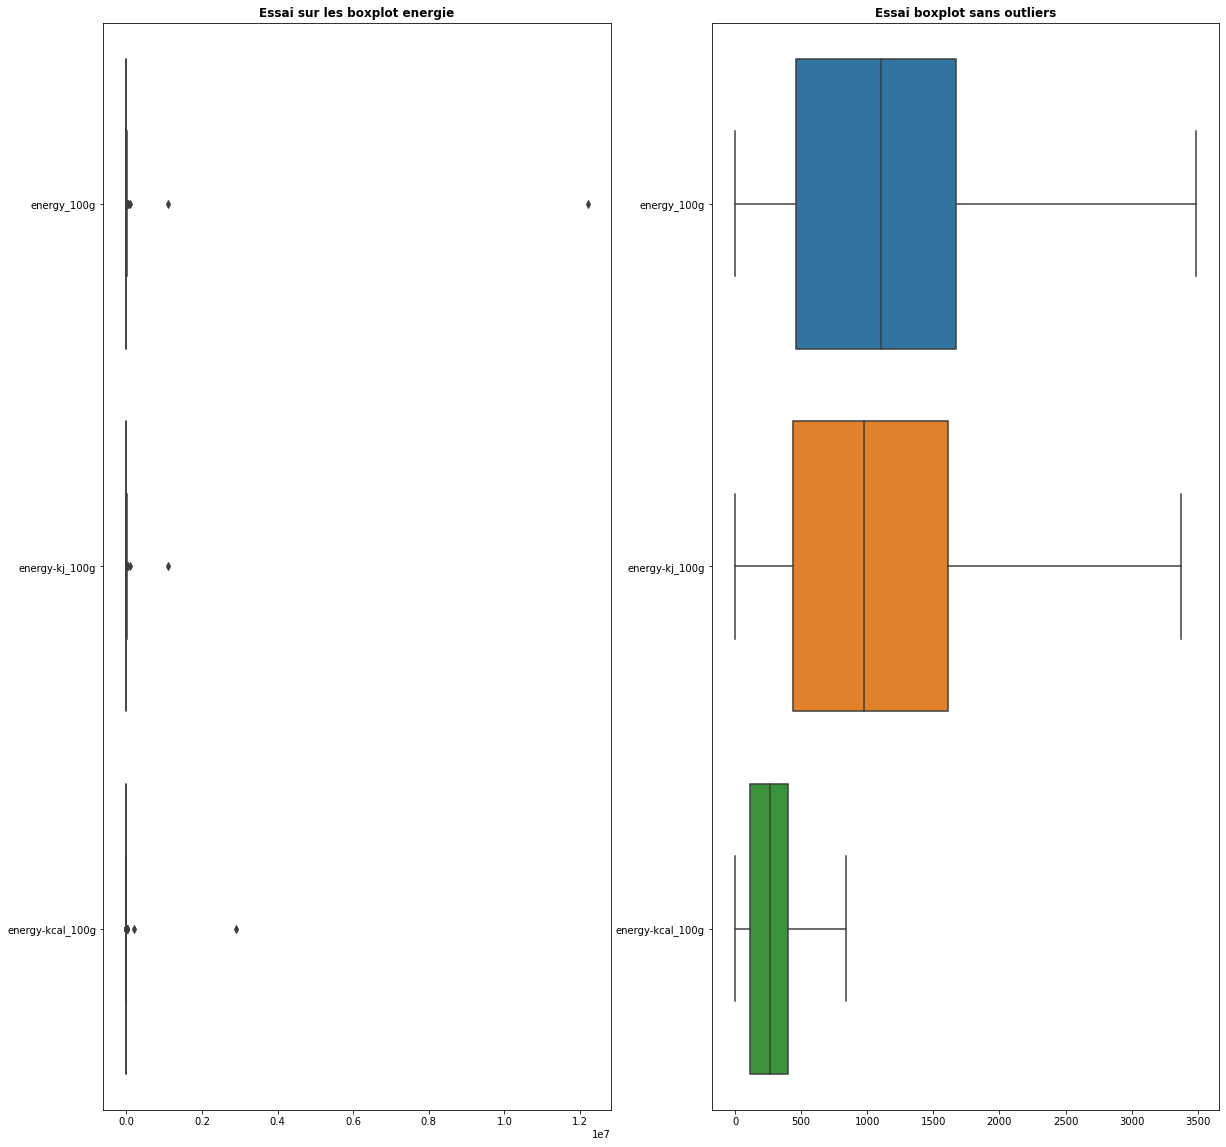

In [11]:
figure1 = plt.figure(figsize = (20,20))
figure1.add_subplot(1,2,1)
plt.title('Essai sur les boxplot energie',fontweight = 'bold')
sns.boxplot(data = df_numeric.loc[:,['energy_100g','energy-kj_100g','energy-kcal_100g']],orient = 'h')
figure1.add_subplot(1,2,2)
plt.title('Essai boxplot sans outliers',fontweight = 'bold')
sns.boxplot(data = df_numeric.loc[:,['energy_100g','energy-kj_100g','energy-kcal_100g']],orient = 'h',showfliers = False)
plt.show()

### **Watching boxplot there is weird values above 4500kJ which would be a maximum for oil!! We filter those points on energy which can be evaluate as wrong values**

In [12]:
df_clean2 = df_clean.loc[(df_clean['energy_100g'] <= 4500)].copy()
df_clean2

,code,product_name,brands,categories,labels,main_category,pnns_groups_1,pnns_groups_2,ingredients_text,serving_size,...,salt_100g,fiber_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,nova_group,carbon-footprint_100g,fruits-vegetables-nuts_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.40,NaN,7.8,70.1,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000100,moutarde au moût de raisin,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Delois france,en:mustards,Fat and sauces,Dressings and sauces,eau graines de téguments de moutarde vinaigre ...,NaN,...,4.60,0.0,5.1,29.0,18.0,18.0,d,NaN,NaN,NaN
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,2.04,NaN,0.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000178,Mini coco,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.15,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
11,000000000080,Pur jus de pomme,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,0.00,NaN,0.2,15.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795279,9999991149090,Riz parfumé,King Elephant,"Aliments et boissons à base de végétaux, Alime...",NaN,en:aromatic-rices,Cereals and potatoes,Cereals,NaN,NaN,...,0.00,NaN,7.0,80.0,0.0,0.0,b,NaN,NaN,NaN
795281,99999988,Boules,NaN,NaN,"Vegetarian, Vegan, en:organic",NaN,unknown,unknown,NaN,NaN,...,0.02,NaN,6.3,58.0,NaN,NaN,NaN,NaN,NaN,NaN
795282,9999999004360,Minis beignets,NaN,"Snacks, Snacks sucrés, Beignets sucrés",NaN,en:sweet-fritters,unknown,unknown,NaN,NaN,...,1.10,NaN,7.4,30.9,15.0,15.0,d,NaN,NaN,NaN
795283,99999995,Steak haché pur boeuf,NaN,"Viandes, Bœuf, Steaks, Steaks de bœuf, Steaks ...",NaN,en:ground-beef-steaks,Fish Meat Eggs,Meat,NaN,NaN,...,0.18,NaN,21.5,0.0,-2.0,-2.0,a,NaN,NaN,NaN


### **Keeping the first column energy and transforming its values in kcal ratio is 0.239**

#### **Evaluate the ratio to pass kj --> kcal and filtering values that are not corresponding**

In [13]:
df_clean2['energy_ratio'] = df_clean2['energy-kcal_100g'] / df_clean2['energy_100g']
df_clean2['energy_ratio'].describe()

count    5.761640e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.389486e-01
50%      2.390057e-01
75%      2.390625e-01
max               inf
Name: energy_ratio, dtype: float64

#### **Filtering values where the ration between kJ and kcal seems wrong**

In [14]:
df_clean2 = df_clean2.loc[(df_clean2['energy_ratio'] > 0.22) & (df_clean2['energy_ratio'] < 0.25)].copy()


In [15]:
coeff_kj_kcal = df_clean2['energy_ratio'].describe()['50%']

#### **Keeping only one column for energy in kcal**

In [16]:
df_clean2['energy_100g']

0         1569.0
4           88.0
5          251.0
11         264.0
13         134.0
           ...  
795278    1661.0
795279    1469.0
795281    1556.0
795282    1393.0
795283     548.0
Name: energy_100g, Length: 566635, dtype: float64

In [17]:
df_clean2.drop(labels = ['energy-kj_100g','energy-kcal_100g','energy_ratio'],axis = 1,inplace = True)

In [18]:
df_clean2['energy_100g'] = df_clean['energy_100g']*coeff_kj_kcal

### **Trying to catch products that have principal nutriment mass-sum above 100g which would be wrong**

In [19]:
list_principal_nutr = ['fat_100g','carbohydrates_100g','proteins_100g','salt_100g','fiber_100g']
df_clean2 = df_clean2.loc[df_clean2.loc[:,list_principal_nutr].sum(axis = 1) <= 100]



In [20]:
df_clean2

,code,product_name,brands,categories,labels,main_category,pnns_groups_1,pnns_groups_2,ingredients_text,serving_size,...,salt_100g,fiber_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,nova_group,carbon-footprint_100g,fruits-vegetables-nuts_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.40,NaN,7.8,70.1,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,2.04,NaN,0.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000178,Mini coco,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.15,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
11,000000000080,Pur jus de pomme,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,0.00,NaN,0.2,15.5,NaN,NaN,NaN,NaN,NaN,NaN
13,0000000000949,Salade de carottes râpées,NaN,"Plats préparés, Légumes préparés, Carottes râp...",NaN,en:seasoned-shredded-carrots,Composite foods,One-dish meals,NaN,NaN,...,0.42,NaN,0.9,5.3,1.0,1.0,b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795278,9999991087217,Pastilles à l'eau de lourdes,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,NaN,NaN,0.2,99.0,NaN,NaN,NaN,NaN,NaN,NaN
795279,9999991149090,Riz parfumé,King Elephant,"Aliments et boissons à base de végétaux, Alime...",NaN,en:aromatic-rices,Cereals and potatoes,Cereals,NaN,NaN,...,0.00,NaN,7.0,80.0,0.0,0.0,b,NaN,NaN,NaN
795281,99999988,Boules,NaN,NaN,"Vegetarian, Vegan, en:organic",NaN,unknown,unknown,NaN,NaN,...,0.02,NaN,6.3,58.0,NaN,NaN,NaN,NaN,NaN,NaN
795282,9999999004360,Minis beignets,NaN,"Snacks, Snacks sucrés, Beignets sucrés",NaN,en:sweet-fritters,unknown,unknown,NaN,NaN,...,1.10,NaN,7.4,30.9,15.0,15.0,d,NaN,NaN,NaN


#### 5670 products with wrong mass values for nutriments have been removed

### **Making the same exercice as ernegy on outliers with the nutriments**

For fat_100g 
 Min: 0.000, Max: 100.000, Mean: 14.496, Median: 8.500, Std: 17.423, Var: 303.559
For saturated-fat_100g 
 Min: 0.000, Max: 400.000, Mean: 5.574, Median: 2.200, Std: 7.987, Var: 63.786
For carbohydrates_100g 
 Min: 0.000, Max: 100.000, Mean: 27.795, Median: 15.000, Std: 27.696, Var: 767.049
For sugars_100g 
 Min: 0.000, Max: 100.000, Mean: 14.135, Median: 3.800, Std: 20.160, Var: 406.432
For proteins_100g 
 Min: 0.000, Max: 100.000, Mean: 9.118, Median: 6.400, Std: 9.946, Var: 98.924
For salt_100g 
 Min: 0.000, Max: 100.000, Mean: 1.158, Median: 0.580, Std: 3.072, Var: 9.436
For fiber_100g 
 Min: 0.000, Max: 91.800, Mean: 2.954, Median: 1.700, Std: 4.633, Var: 21.465


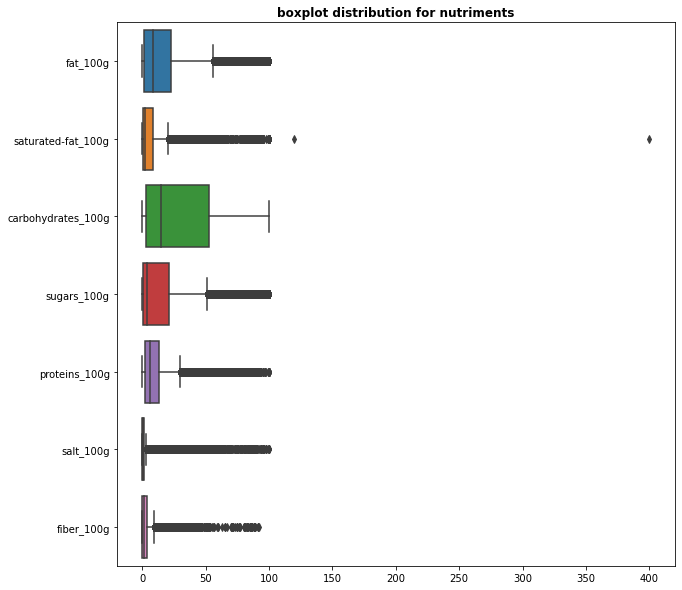

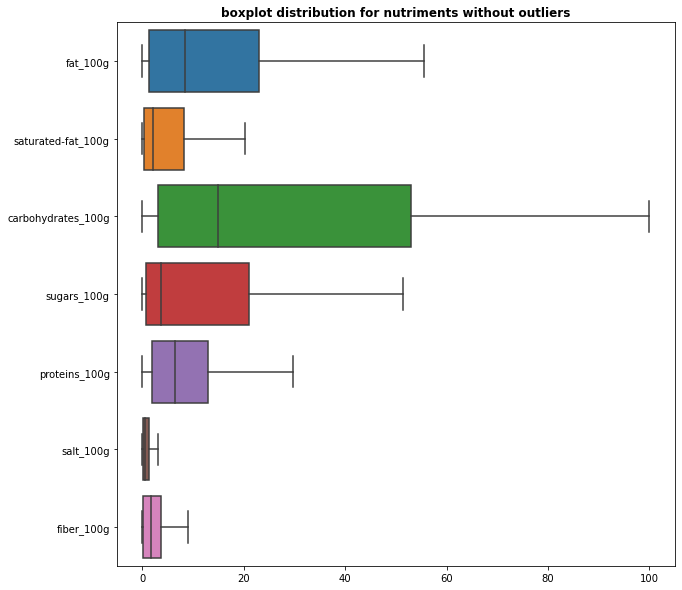

In [21]:
list_nutr = ['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','fiber_100g']
for nutr in list_nutr:
    print (f'For {nutr} \n Min: {df_clean2.loc[:,nutr].min():.3f}, Max: {df_clean2.loc[:,nutr].max():.3f}, Mean: {df_clean2.loc[:,nutr].mean():.3f}, Median: {df_clean2.loc[:,nutr].median():.3f}, Std: {df_clean2.loc[:,nutr].std():.3f}, Var: {df_clean2.loc[:,nutr].var():.3f}')

figure3 = plt.figure(figsize = (10,10))
plt.title(f'boxplot distribution for nutriments',fontweight = 'bold')
sns.boxplot(data = df_clean2.loc[:,list_nutr],orient = 'h')
figure4 = plt.figure(figsize = (10,10))
plt.title(f'boxplot distribution for nutriments without outliers',fontweight = 'bold')
sns.boxplot(data = df_clean2.loc[:,list_nutr],orient = 'h',showfliers = False)
plt.show()

### **We are making sure to exclude values under 0 and above 100, it is for 100g of product. Not needed regarding values under 0g**

In [22]:
df_clean2 = df_clean2.loc[(df_clean2['saturated-fat_100g'] <= 100) & (df_clean2['carbohydrates_100g'] >= 0) & (df_clean2['sugars_100g'] >= 0)]

In [23]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556359 entries, 0 to 795283
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         556359 non-null  object 
 1   product_name                 554832 non-null  object 
 2   brands                       310299 non-null  object 
 3   categories                   260415 non-null  object 
 4   labels                       185614 non-null  object 
 5   main_category                260415 non-null  object 
 6   pnns_groups_1                555172 non-null  object 
 7   pnns_groups_2                556359 non-null  object 
 8   ingredients_text             185310 non-null  object 
 9   serving_size                 60991 non-null   object 
 10  additives_n                  185311 non-null  float64
 11  additives_en                 102221 non-null  object 
 12  energy_100g                  556359 non-null  float64
 13 

### **Check on nutrition score and nova group**

For nutriscore_score 
 Min: -15.000, Max: 40.000, Mean: 9.749, Median: 11.000, Std: 8.723, Var: 76.089
For nova_group 
 Min: 1.000, Max: 4.000, Mean: 3.482, Median: 4.000, Std: 0.905, Var: 0.819


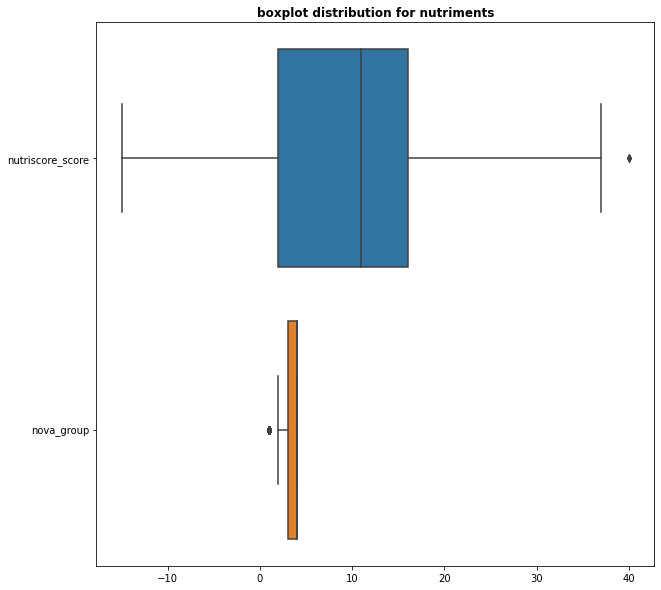

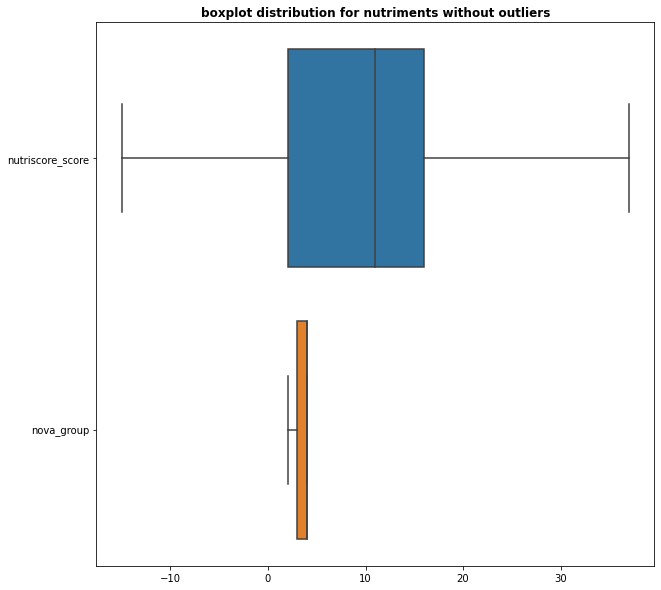

In [24]:
list_nutnova = ['nutriscore_score','nova_group']
for ind in list_nutnova:
    print (f'For {ind} \n Min: {df_clean2.loc[:,ind].min():.3f}, Max: {df_clean2.loc[:,ind].max():.3f}, Mean: {df_clean2.loc[:,ind].mean():.3f}, Median: {df_clean2.loc[:,ind].median():.3f}, Std: {df_clean2.loc[:,ind].std():.3f}, Var: {df_clean2.loc[:,ind].var():.3f}')

figure3 = plt.figure(figsize = (10,10))
plt.title(f'boxplot distribution for nutriments',fontweight = 'bold')
sns.boxplot(data = df_clean2.loc[:,list_nutnova],orient = 'h')
figure4 = plt.figure(figsize = (10,10))
plt.title(f'boxplot distribution for nutriments without outliers',fontweight = 'bold')
sns.boxplot(data = df_clean2.loc[:,list_nutnova],orient = 'h',showfliers = False)
plt.show()

#### Nothing seemed wrong with Nutriscore and Nova Group in our data

## **Evaluate our data after cleaning**

columns with first values is code and columns with last value is fruits-vegetables-nuts_100g
There is 59.83850770400462 percent of values available in the Dataframe, available data above 0 percent have been kept


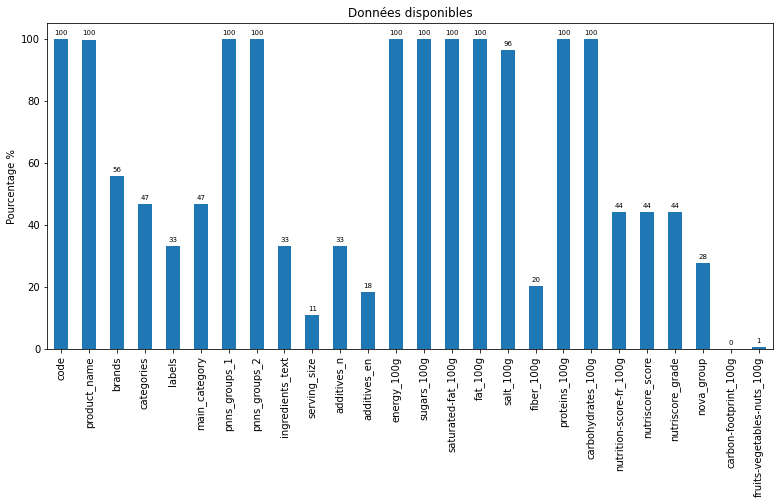

,code,product_name,brands,categories,labels,main_category,pnns_groups_1,pnns_groups_2,ingredients_text,serving_size,...,salt_100g,fiber_100g,proteins_100g,carbohydrates_100g,nutrition-score-fr_100g,nutriscore_score,nutriscore_grade,nova_group,carbon-footprint_100g,fruits-vegetables-nuts_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.40,NaN,7.8,70.1,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,2.04,NaN,0.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000178,Mini coco,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,1.15,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
11,000000000080,Pur jus de pomme,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,0.00,NaN,0.2,15.5,NaN,NaN,NaN,NaN,NaN,NaN
13,0000000000949,Salade de carottes râpées,NaN,"Plats préparés, Légumes préparés, Carottes râp...",NaN,en:seasoned-shredded-carrots,Composite foods,One-dish meals,NaN,NaN,...,0.42,NaN,0.9,5.3,1.0,1.0,b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795278,9999991087217,Pastilles à l'eau de lourdes,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,...,NaN,NaN,0.2,99.0,NaN,NaN,NaN,NaN,NaN,NaN
795279,9999991149090,Riz parfumé,King Elephant,"Aliments et boissons à base de végétaux, Alime...",NaN,en:aromatic-rices,Cereals and potatoes,Cereals,NaN,NaN,...,0.00,NaN,7.0,80.0,0.0,0.0,b,NaN,NaN,NaN
795281,99999988,Boules,NaN,NaN,"Vegetarian, Vegan, en:organic",NaN,unknown,unknown,NaN,NaN,...,0.02,NaN,6.3,58.0,NaN,NaN,NaN,NaN,NaN,NaN
795282,9999999004360,Minis beignets,NaN,"Snacks, Snacks sucrés, Beignets sucrés",NaN,en:sweet-fritters,unknown,unknown,NaN,NaN,...,1.10,NaN,7.4,30.9,15.0,15.0,d,NaN,NaN,NaN


In [27]:
columnsDataAvailable(df_clean2,0)

### **We can se that our last two columns are not filled enough. They could be useless for our problematic**

## **Saving our final cleaned file**

In [28]:
df_clean2.reset_index(drop = True,inplace = True)
df_clean2.to_csv('openfoodfacts_clean_final.csv',sep = '\t')